In [2]:
#This project was inspired by the followig playlist:
#https://www.youtube.com/playlist?list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So

In [172]:
#importing libraries we need in our learning process

from matplotlib import pyplot as plt #I use this library to draw graphs 
import numpy as np #This library offers me mathmatecial functions
import win32com.client #win32com.client library makes my pc pronounce some words

speaker = win32com.client.Dispatch("SAPI.SpVoice") #initializing an object in win32com.client library

In [173]:
#My set of data [Height , Weight , Gender] 0 --> male , 1--> female
#I used the .XXX format for heights & .XX foramt for weights to cross the gradient vanishing problem that happens bacause of using tanh or sigmoid functions as activation function

Data = [[.179, .93  ,0],
        [.182, .65  ,0],
        [.176, .77  ,0],
        [.183, .60  ,0],
        [.165, .84  ,0],
        [.179, .97  ,0],
        [.168, .69  ,0],
        [.190, .115 ,0],
        [.176, .78  ,0],
        [.170, .71  ,0],
        [.161, .65  ,1],
        [.159, .60  ,1],
        [.170, .61  ,1],
        [.170, .67  ,1],
        [.162, .57  ,1],
        [.163, .56  ,1],
        [.158, .65  ,1],
        [.162, .58  ,1],
        [.154, .42  ,1],
        [.155, .45  ,1],
        [.154, .53  ,1]]


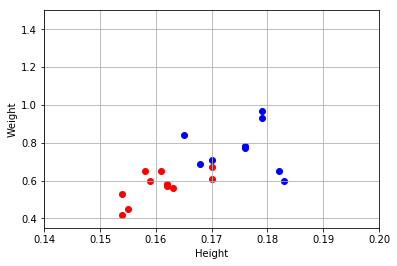

In [174]:
#Plotting Data

plt.grid() #this function gives my plot the grid look
plt.axis([0.140 , 0.2 , 0.35 , 1.50]) #Determine my x axis and y axis points
plt.xlabel("Height") #labeling the x axis
plt.ylabel("Weight") #labeling the y axis

for i in range(len(Data)):
    point = Data[i] 
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0] , point[1] , c = color) # plt.scatter(x point , y point , point color)

In [175]:
#Define the Activation function

def Tanh(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))

def Tanh_p(x): #the derivative of my Activation function
    return 1 - np.square(Tanh(x))

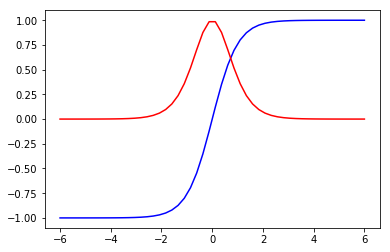

In [176]:
#plotting my functions in graphs to check if I am on the right way
T = np.linspace(-6,6) #the range of the x axis is (-6,6)
plt.plot(T , Tanh(T) , c = 'b')
plt.plot(T , Tanh_p(T) , c = 'r') #plt.plot(x axis range , f(x) , Graph color)

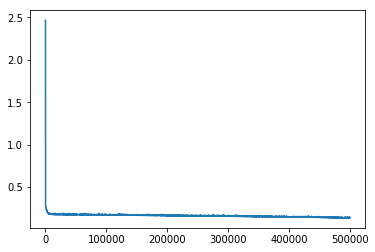

In [177]:
#Training loop

Learning_rate = 0.02

costs = []

#initializing the weights and the bias as random values

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()



for i in range(500000): #The program will do 500000 iterations to train my module
    
    ri = np.random.randint(len(Data)) #This function will return a random index to choose a random set from Data
    point = Data[ri]
    
    z = point[0]*w1 + point[1]*w2 + b #Our module
    
    #Some Calculus 
    
    pred = Tanh(z)
    Target = point[2]
    cost = np.square(pred - Target)
    
    dcost_dpred = 2 * (pred - Target) #The partial derivative of the cost functon with respect to pred
    dpred_dz = Tanh_p(z)  #The partial derivative of the pred functon with respect to z
    dz_dw1 = point[0]  #The partial derivative of the z functon with respect to w1
    dz_dw2 = point[1]  #The partial derivative of the z functon with respect to w2
    dz_db  = 1  #The partial derivative of the z functon with respect to b
    
    
    #Chain rule
    
    dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1  #The derivative of the cost functon with respect to w1
    dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2  #The derivative of the cost functon with respect to w2
    dcost_db  = dcost_dpred * dpred_dz * dz_db   #The derivative of the cost functon with respect to b
    
    w1 = w1 - Learning_rate * dcost_dw1
    w2 = w2 - Learning_rate * dcost_dw2
    b  = b  - Learning_rate * dcost_db
    
    
  
    if i%100 == 0:
        cost_sum = 0
        
        for j in range(len(Data)): #This loop will update our costs list every 100 iteration so we can plot the costs in the future
            point = Data[j]
            z = point[0]*w1 + point[1]*w2 + b
            pred = Tanh(z)
            Target = point[2]
            cost = np.square(pred - Target)
            
            cost_sum = cost_sum + cost
    
    
    
                
    costs.append(cost_sum / len(Data))
    
plt.plot(costs)  #This function will plot costs list to check if our module is working or not

In [190]:
#Testing our module

Unknown = [.0 , .0]

z = Unknown[0]*w1 + Unknown[1]*w2 + b
pred = Tanh(z)

if pred > .5 :
    speaker.speak("Female") #The program will pronounce "Female"
    print("Female")
else:
    speaker.speak("Male") #The program will pronounce "Male"
    print("Male")
    
print(pred)

Female
0.9997526950645345
